<a href="https://colab.research.google.com/github/jessicasilvacodes/machinelearning-pucminas/blob/main/clima_arvore_de_decisao_pucminas_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de Decisão (dados nominais):

Este notebook foi desenvolvido para projetos e exercícios de Machine Learning do curso de CIÊNCIA DE DADOS APLICADA À SAÚDE da PUC Minas.

Autora: Jessica Santos da Silva

Professor: Hugo de Paula







### Base de dados: Clima-Nominal

http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html




**DESCRIÇÃO DOS ATRIBUTOS:**

1. Aparência {Ensolarado, Nublado, Chuvoso}
2. Temperatura {Quente, Moderado, Frio}
3. Umidade {Alta, Normal}
4. Vento {Fraco, Forte}
5. Jogar {Sim, Não}

### Inicialização da plataforma do Colab:

In [17]:
!pip install pydotplus
!pip install dtreeviz

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from google.colab import files

uploaded = files.upload()

Saving clima.csv to clima (2).csv


### Transformação de dados:

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


In [19]:
clima_nominal = pd.read_csv("clima.csv", sep=';')
print("\nDimensões: {0}".format(clima_nominal.shape))
print("\nCampos: {0}".format(clima_nominal.keys()))
print(clima_nominal.describe(), sep='\n')

X_dict = clima_nominal.iloc[:,0:4].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X_train = vect.fit_transform(X_dict)

le = LabelEncoder()
y_train = le.fit_transform(clima_nominal.iloc[:,4])

# Exibe o dado convertido em dicionario.
print("Atributos:", X_dict)

# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento: {0}".format(X_train.shape))

print("Labels:", y_train)


Dimensões: (14, 5)

Campos: Index(['Aparência', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')
       Temperatura    Umidade
count    14.000000  14.000000
mean     73.571429  81.642857
std       6.571667  10.285218
min      64.000000  65.000000
25%      69.250000  71.250000
50%      72.000000  82.500000
75%      78.750000  90.000000
max      85.000000  96.000000
Atributos: dict_values([{'Aparência': 'Ensolarado', 'Temperatura': 85, 'Umidade': 85, 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 80, 'Umidade': 90, 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 83, 'Umidade': 86, 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 70, 'Umidade': 96, 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 68, 'Umidade': 80, 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 65, 'Umidade': 70, 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 64, 'Umidade': 65, 'Vento': 'Forte'}, {'Aparência': 'Ensolarado', 'Temperatura': 7

### Indução do modelo:


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [20]:
treeClima = DecisionTreeClassifier(random_state=0, criterion='entropy')
treeClima = treeClima.fit(X_train, y_train)
print("Acurácia:", treeClima.score(X_train, y_train))

y_pred = treeClima.predict(X_train)
print("Acurácia de previsão:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

cnf_matrix = confusion_matrix(y_train, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Jogar=Não", "Jogar=Sim"], columns=["Jogar(prev)=Não", "Prev. Jogar(prev)=Sim"])
print(cnf_table)


Acurácia: 1.0
Acurácia de previsão: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

           Jogar(prev)=Não  Prev. Jogar(prev)=Sim
Jogar=Não                5                      0
Jogar=Sim                0                      9


### Exibição da árvore de decisão:



In [31]:
!pip install dtreeviz

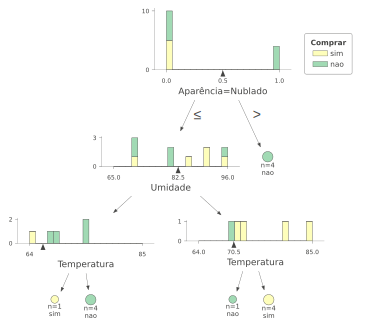

In [36]:
import dtreeviz

viz = dtreeviz.model(treeClima,
              X_train,
              y_train,
              target_name='Comprar',
               feature_names=vect.feature_names_,
              class_names=["sim", "nao"])

viz.view()

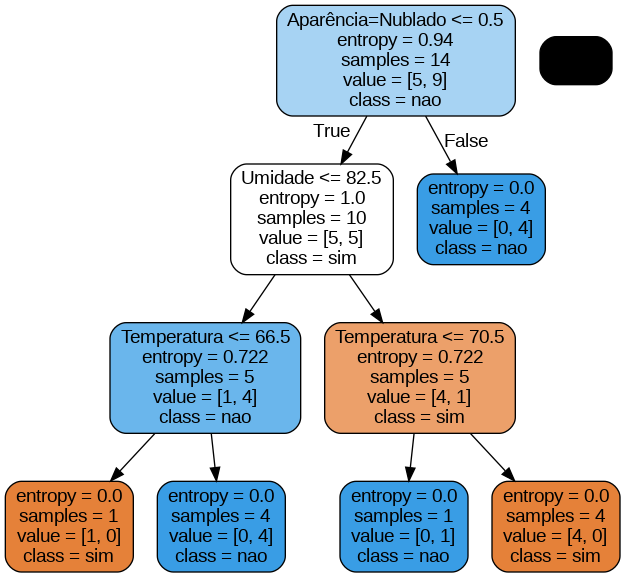

In [37]:
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(treeClima, out_file=None,
                                feature_names=vect.feature_names_,
                                rounded =True,
                                filled=True,
                                class_names=["sim", "nao"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())